# Decision Tree

### TASK 3 
**To Explore Decision Tree Algorithm** 

For the given 'Iris' dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

This notebooks deals with understanding the working of decision trees.

In [1]:
# Install required libraries
#!pip install pydotplus
#!pip install graphviz
#conda install graphviz

## Importing the Required Libraries and Reading the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
df = pd.read_csv('Iris.csv', index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#looking for imbalance in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis =1)
df1.shape


(150, 4)

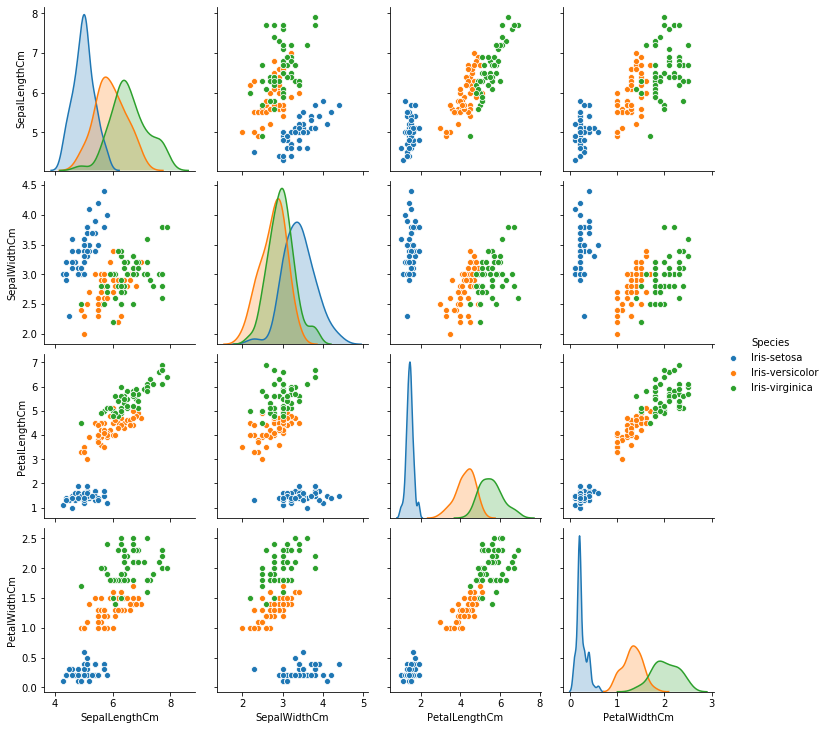

In [6]:
# No Null values observed 
# let's plot pair plot to visualise the attributes all at once

sns.pairplot(df, hue = 'Species')

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other.

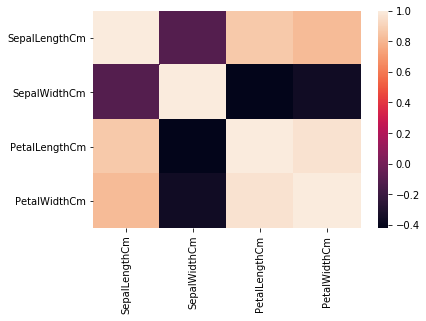

In [7]:
# correlation matrix
sns.heatmap(df.corr())

Observations made - 
1. Petal length is highly related to petal width.
2. Sepal lenth is not related sepal width.

In [8]:
# Defining the attributes and labels

X = df.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values  #Labels

print("The shape of the data is-", df.shape)

The shape of the data is- (150, 5)


## Model Training

Let us split the data into test and train for trainig our model.

In [9]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

print("Training split - ", X_train.shape)
print("Testing split - ", X_test.shape)

Training split -  (120, 4)
Testing split -  (30, 4)


In [10]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [11]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1, 'Accuracy Score: 1.0')

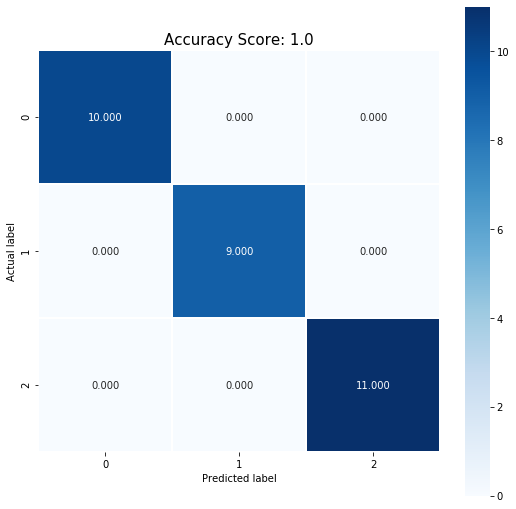

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

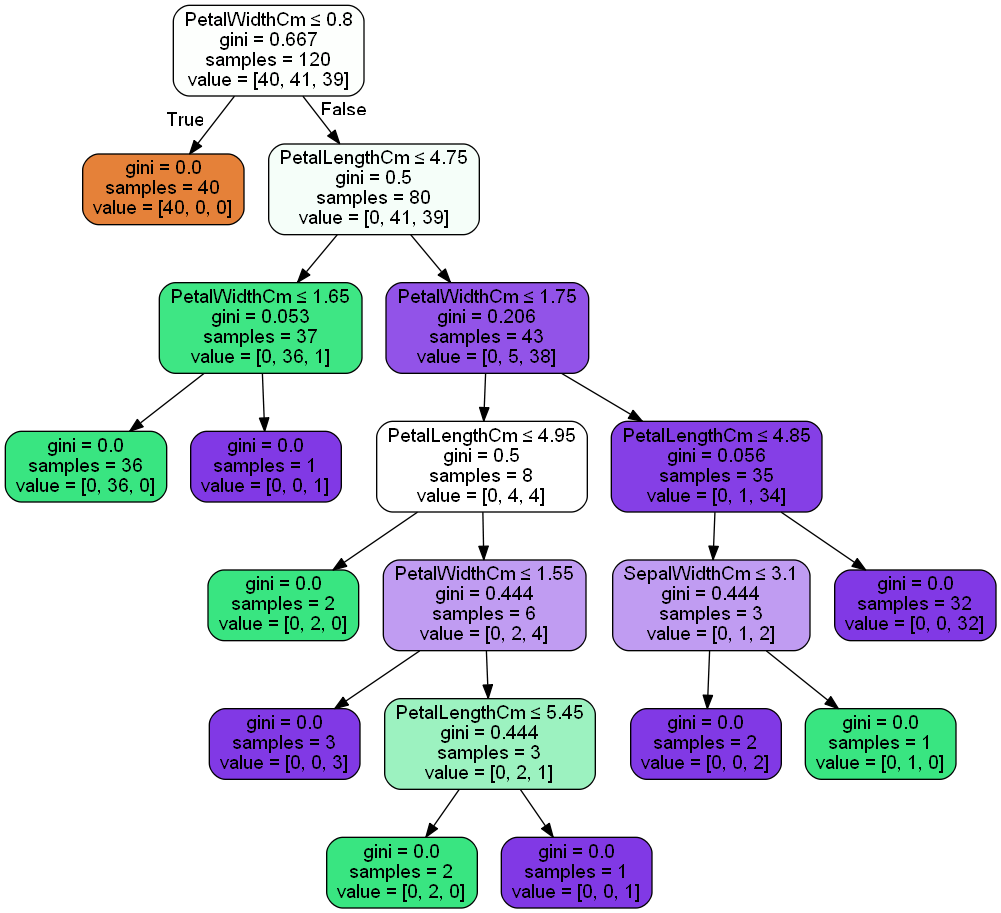

In [13]:
# Visualize the graph
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names= df1.columns ,  
                filled=True, rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

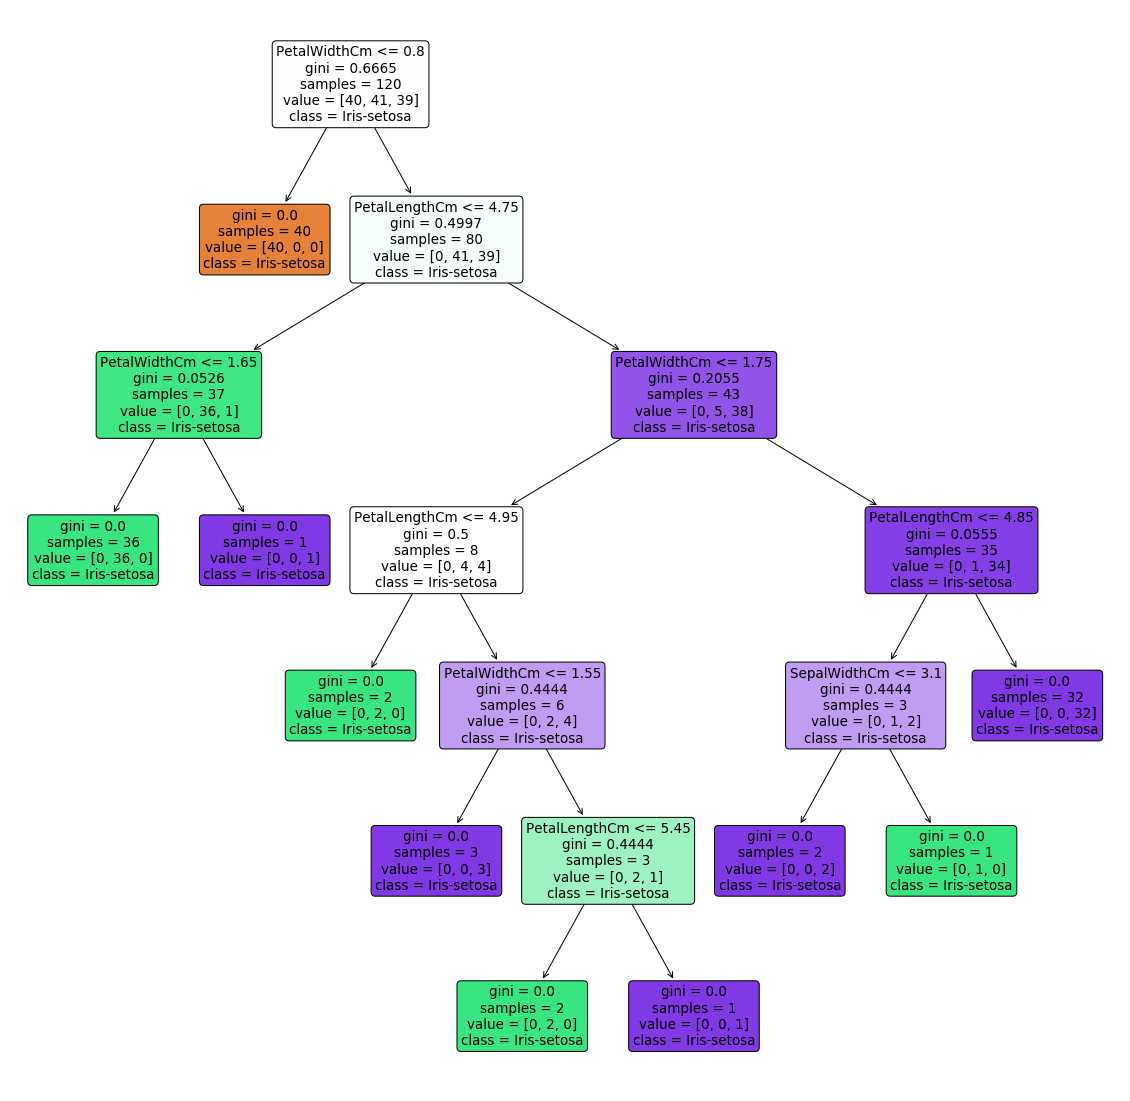

In [15]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);

This concludes this notebook.

# THANK YOU